# Ames House Price Prediction

In this project, I predicted the house prices of Ames Housing.

The dataset contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.

In [94]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [95]:
df_train=pd.read_csv('train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [96]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [97]:
df_test=pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [98]:
# Saving the Id columns
train_id=df_train['Id']
test_id=df_test['Id']

# Dropping Id columns from both train and test as these are not needed for prediction
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

# Data Visualization and Processing

## 1) Visualizing and Removing Outliers

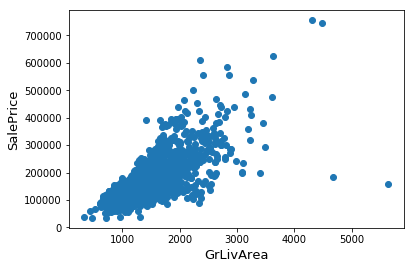

In [99]:
# Exploring outliers

fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

There are extreme outliers for GrLivArea>4000 as per http://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt

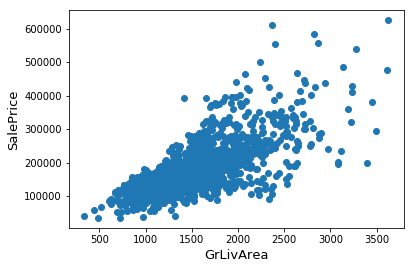

In [100]:
# Removing outliers

df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000)].index)

#Check the scatter plot again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## 2) Predicting Nature of Target Variable


 mu = 180151.23 and sigma = 76670.25



Text(0.5,1,'SalePrice distribution')

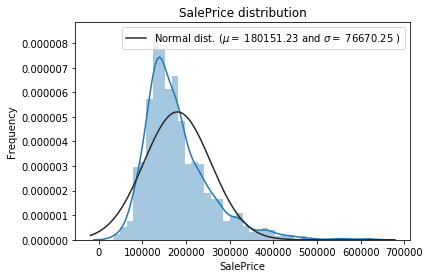

In [101]:
# Histogram plot of SalePrice
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

### We can make 2 observations from the above plot:-

1) SalePrice data is right-skewed and unimodal.

2) Most of the houses have SalePrice around 150000.

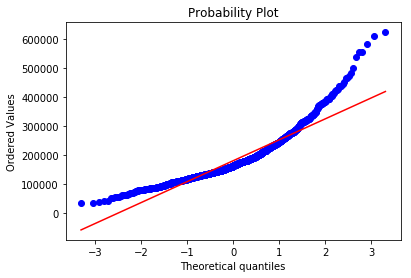

In [102]:
# Probability plot or QQ plot to see the linear fit of the SalePrice

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

The SalePrice is not linearly fitted as it is not normally distributed. We need to make log transformation on the target variable to make it more fit to the linear model.

In [103]:
# Log Transformation of the Target Variable
df_train["SalePrice"]=np.log1p(df_train["SalePrice"]) # log(1+x)


 mu = 12.02 and sigma = 0.40



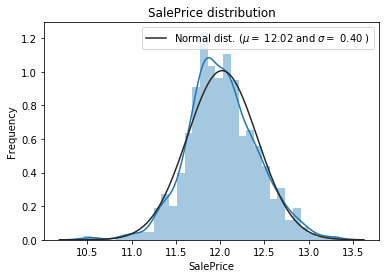

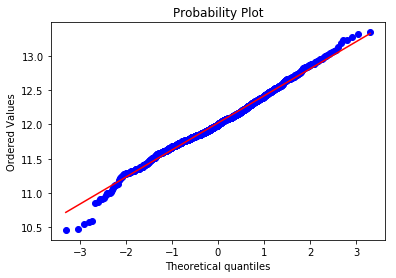

In [104]:
# Plots after transformation

# Histogram plot of SalePrice
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Probability plot or QQ plot to see the linear fit of the SalePrice
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

## 3) Handling Missing Data

In [105]:
# Combining test data and train data
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data = pd.get_dummies(all_data)
all_data.shape

(2915, 287)

In [106]:
# Imputing missing data by the mean of each column.
all_data = all_data.fillna(all_data.mean())

# Modelling the data

In [107]:
# Generating train and test sets

X_train=all_data[:df_train.shape[0]]
X_test=all_data[:df_test.shape[0]]

y_train=df_train.SalePrice

In [108]:
# Importing libraries for modelling

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [109]:
# Cross Validation Strategy to pick the best model

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [110]:
# Linear regression
model_LinearReg = LinearRegression()
model_LinearReg.fit(X_train, y_train)
rmse_LinearReg = rmse_cv(model_LinearReg).mean()
rmse_LinearReg

41943.027937965046

In [111]:
# RidgeCV
model_RidgeCV = RidgeCV()
model_RidgeCV.fit(X_train, y_train)
rmse_RidgeCV = rmse_cv(model_RidgeCV).mean()
rmse_RidgeCV

0.11521457228575138

In [112]:
# ElasticNet
model_ElasticNet=ElasticNet()
model_ElasticNet.fit(X_train,y_train)
rmse_ElasticNet=rmse_cv(model_ElasticNet).mean()
rmse_ElasticNet

0.16290544073550187

In [113]:
# ElasticNetCV
model_ElasticNetCV=ElasticNetCV()
model_ElasticNetCV.fit(X_train,y_train)
rmse_ElasticNetCV=rmse_cv(model_ElasticNetCV).mean()
rmse_ElasticNetCV

0.17145879351688137

In [114]:
# lassoCV
model_lassoCV=LassoCV()
model_lassoCV.fit(X_train,y_train)
rmse_lassoCV=rmse_cv(model_lassoCV).mean()
rmse_lassoCV

0.1714364111192795

In [115]:
# LassoLarsCV
model_LassoLarsCV=LassoLarsCV()
model_LassoLarsCV.fit(X_train,y_train)
rmse_LassoLarsCV=rmse_cv(model_LassoLarsCV).mean()
rmse_LassoLarsCV

0.11472945318732745

In [116]:
# KernelRidge
model_KernelRidge=KernelRidge()
model_KernelRidge.fit(X_train,y_train)
rmse_KernelRidge=rmse_cv(model_KernelRidge).mean()
rmse_KernelRidge

0.12007489791031398

In [117]:
# RandomForestRefressor

model_RandomForest=RandomForestRegressor()
model_RandomForest.fit(X_train,y_train)
rmse_RandomForest=rmse_cv(model_RandomForest).mean()
rmse_RandomForest

0.15087162512939914

In [128]:
# XGBoost
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [129]:
rmse_xgb = model.values[-1,0]
rmse_xgb

0.06213066666666667

###  Comparing RMSE of each Model

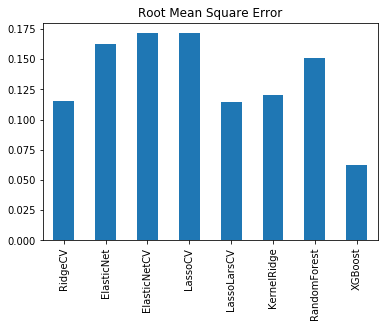

In [120]:
# Creating RMSE Dictionary
rmse_dict = {'data':[rmse_RidgeCV, rmse_ElasticNet, rmse_ElasticNetCV, rmse_lassoCV,rmse_LassoLarsCV,rmse_KernelRidge,rmse_RandomForest,rmse_xgb]}

# Creating RMSE DataFrame 
rmse_df = pd.DataFrame(data = rmse_dict, index = ['RidgeCV','ElasticNet','ElasticNetCV','LassoCV','LassoLarsCV','KernelRidge','RandomForest','XGBoost'])

# Plotting RMSE 
rmse_df.plot.bar(legend = False, title = 'Root Mean Square Error')

### Predicting Test Data

In [121]:
y_test = model_xgb.predict(X_test)

In [122]:
hprice = pd.DataFrame({"id":test_id})
hprice = hprice.assign(SalePrice = y_test)
hprice.head()

,id,SalePrice
0,1461,12.239761
1,1462,12.063485
2,1463,12.262909
3,1464,11.999009
4,1465,12.606689


In [123]:
# Feeding Id and SalePrice into Test data
df_test['SalePrice']=y_test
df_test['Id']=test_id

# Data Visualization for Validation of the Predicted Test Data

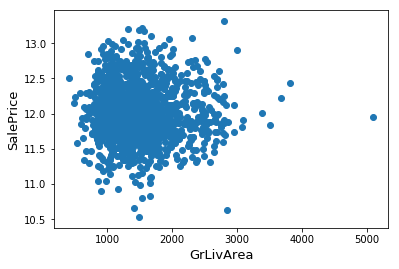

In [124]:
# Visualizing SalePrice with respect to GrLivArea

fig, ax = plt.subplots()
ax.scatter(x = df_test['GrLivArea'], y = df_test['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


 mu = 12.02 and sigma = 0.40



Text(0.5,1,'SalePrice distribution')

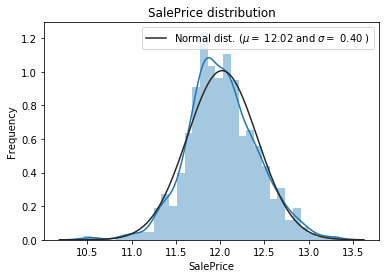

In [125]:
# Histogram plot of SalePrice
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


 mu = 12.02 and sigma = 0.38



Text(0.5,1,'SalePrice distribution')

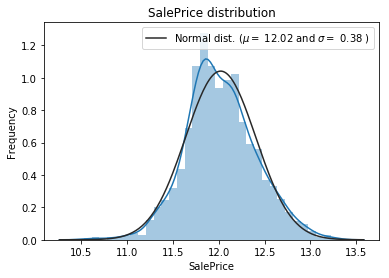

In [126]:
# Histogram plot of SalePrice
sns.distplot(df_test['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_test['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

The histogram plots of both the Train data and the Test data are in sync. Hence, there is high accuracy in the predicted data.

# Exporting the results to external CSV file

In [127]:
df_test[['Id', 'SalePrice']].to_csv('Predicted_House_Price.csv', index=False)